In [8]:
import numpy as np
from theano import tensor as T
import matplotlib.pyplot as plt
from deconv.imports import load_tables, load_bindingData, load_figures
import pymc3 as pm
import arviz as az

A_antiD, _, _, _ = load_tables()

mean_binding = list(load_bindingData())
mean_binding = np.array([m.groupby(level=0).mean() for m in mean_binding])

adcc_3a, adcc_3b = load_figures()
mean_3a = (adcc_3a.groupby(level=0).sum()) / 4
mean_3b = (adcc_3b.groupby(level=0).sum()) / 4

mean_ADCC = np.array([mean_3a, mean_3b])

res = np.concatenate((mean_binding, mean_ADCC))

print(mean_binding.shape, mean_ADCC.shape)
print(res.shape)

(8, 20) (2, 20)
(10, 20)


In [3]:
import numpy as np
#print(chain['posterior'])
#print(chain['log_likelihood'])
#print(chain['observed_data'])
print(type(chain))
print(chain.to_dataframe)
print(chain.posterior.activity_scores[0].shape)

samples = chain.posterior.activity_scores[0]

median = np.median(samples, axis=0)
p33 = np.percentile(samples, 33, axis=0)
p66 = np.percentile(samples, 66, axis=0)

print(median.shape, p33.shape, p66.shape)
print(median[:,0])


<class 'arviz.data.inference_data.InferenceData'>
<bound method InferenceData.to_dataframe of Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data>
(2000, 24, 3)
(24, 3) (24, 3) (24, 3)
[0.03924542 0.04128159 0.03881129 0.04327875 0.05889483 0.0890887
 0.09928897 0.04926376 0.03299759 0.05644657 0.14853148 0.06085692
 0.74761836 0.65916797 0.46207007 1.08936    0.6684028  0.27286702
 0.33033963 0.20007507 0.24980155 0.25391218 0.32136083 0.30809744]


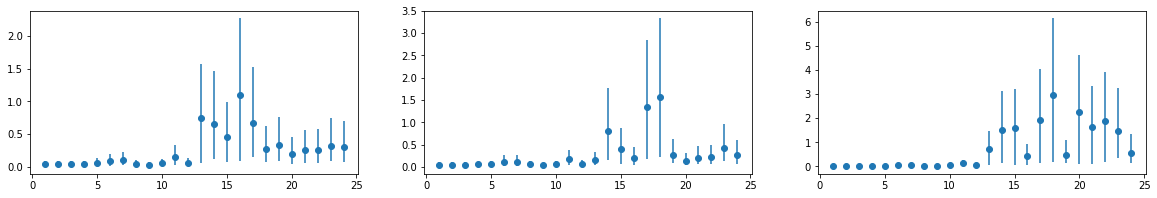

In [14]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)
f, ax = plt.subplots(1, 3)
#plt.scatter(range(1,25), median[:,0])
for i in range(3):
    ax[i].errorbar(range(1,25), median[:,i], yerr=[p33[:,i], p66[:,i]], fmt='o')

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 27000
Interrupted at 26,999 [13%]: Average Loss = 7.3565e+05
Sequential sampling (1 chains in 1 job)
NUTS: [activity_loadings, activity_scores]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 14 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


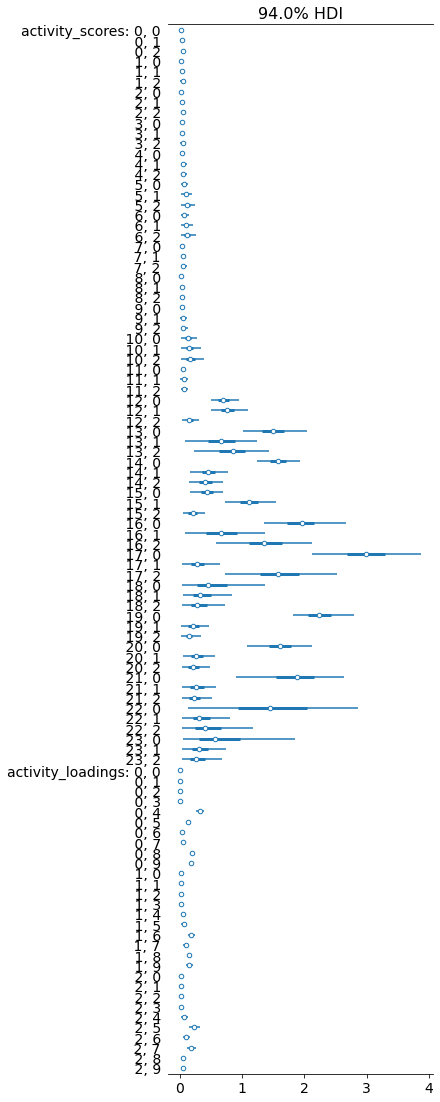

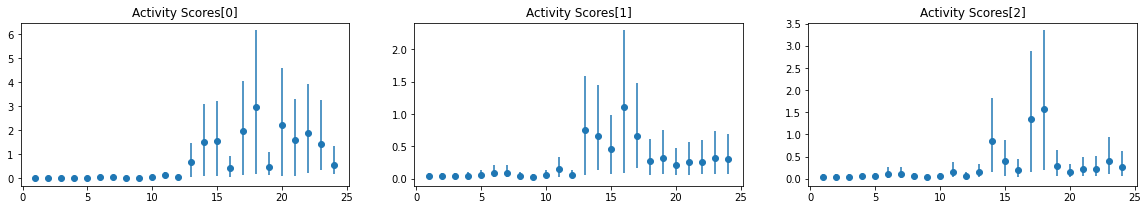

In [1]:
import emceerecp

emceerecp.makeFigure()